<a href="https://colab.research.google.com/github/priyankadri/driti/blob/main/priyanka_airbnb_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Airbnb Booking Analysis Exploratory Data Analysis** **bold text**



##### **Project Type**    - EDA
##### **Contribution**    - Individual-Priyanka Choudhary


# Description




# **Project Summary -**


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# **GitHub Link -**

# **Problem Statement**
To explore and understand the patterns and trends in the Airbnb booking data and to identify any underlying relationships between variables that may impact customer booking decisions."

This problem statement highlights the need to gain a deeper understanding of the underlying patterns and relationships in the Airbnb booking data. The objective of the EDA is to uncover any trends, patterns, or anomalies in the data that may have an impact on customer booking decisions.

The EDA will be an important step in the overall Airbnb booking analysis project as it will help to identify areas of opportunity and highlight areas that require improvement. By conducting an in-depth analysis of the data, the EDA will provide insights into the factors that influence customer behavior and inform the development of predictive models that can be used to optimize the platform.

Ultimately, the EDA will play a crucial role in ensuring the success of the Airbnb booking analysis project by providing a foundation for further analysis and optimization. By exploring and understanding the patterns and trends in the data, the project team will be better equipped to make informed decisions and to drive growth and success for the Airbnb platform.




#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
air_df=pd.read_csv('/Airbnb NYC 2019.csv')

### Dataset First View

In [5]:
air_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [10]:
air_df.shape

(48895, 16)

### Dataset Information

In [11]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the above information we can say that id,price,minimum_nights,number_of_reviews,last_review, reviews_per_month, latitude,longitude,calculated_host_listings_count, availability_365 are numerical variables

neighbourhood_group,neighbourhood,room_type and host_name(because a property have a host name and a host name can have multiple properties in the given neighbourhood) are categorical variable.

#### Duplicate Values

In [15]:
air_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

from the above,we can say that there is in no duplicate value in dataset

#### Missing Values/Null Values

In [16]:
air_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

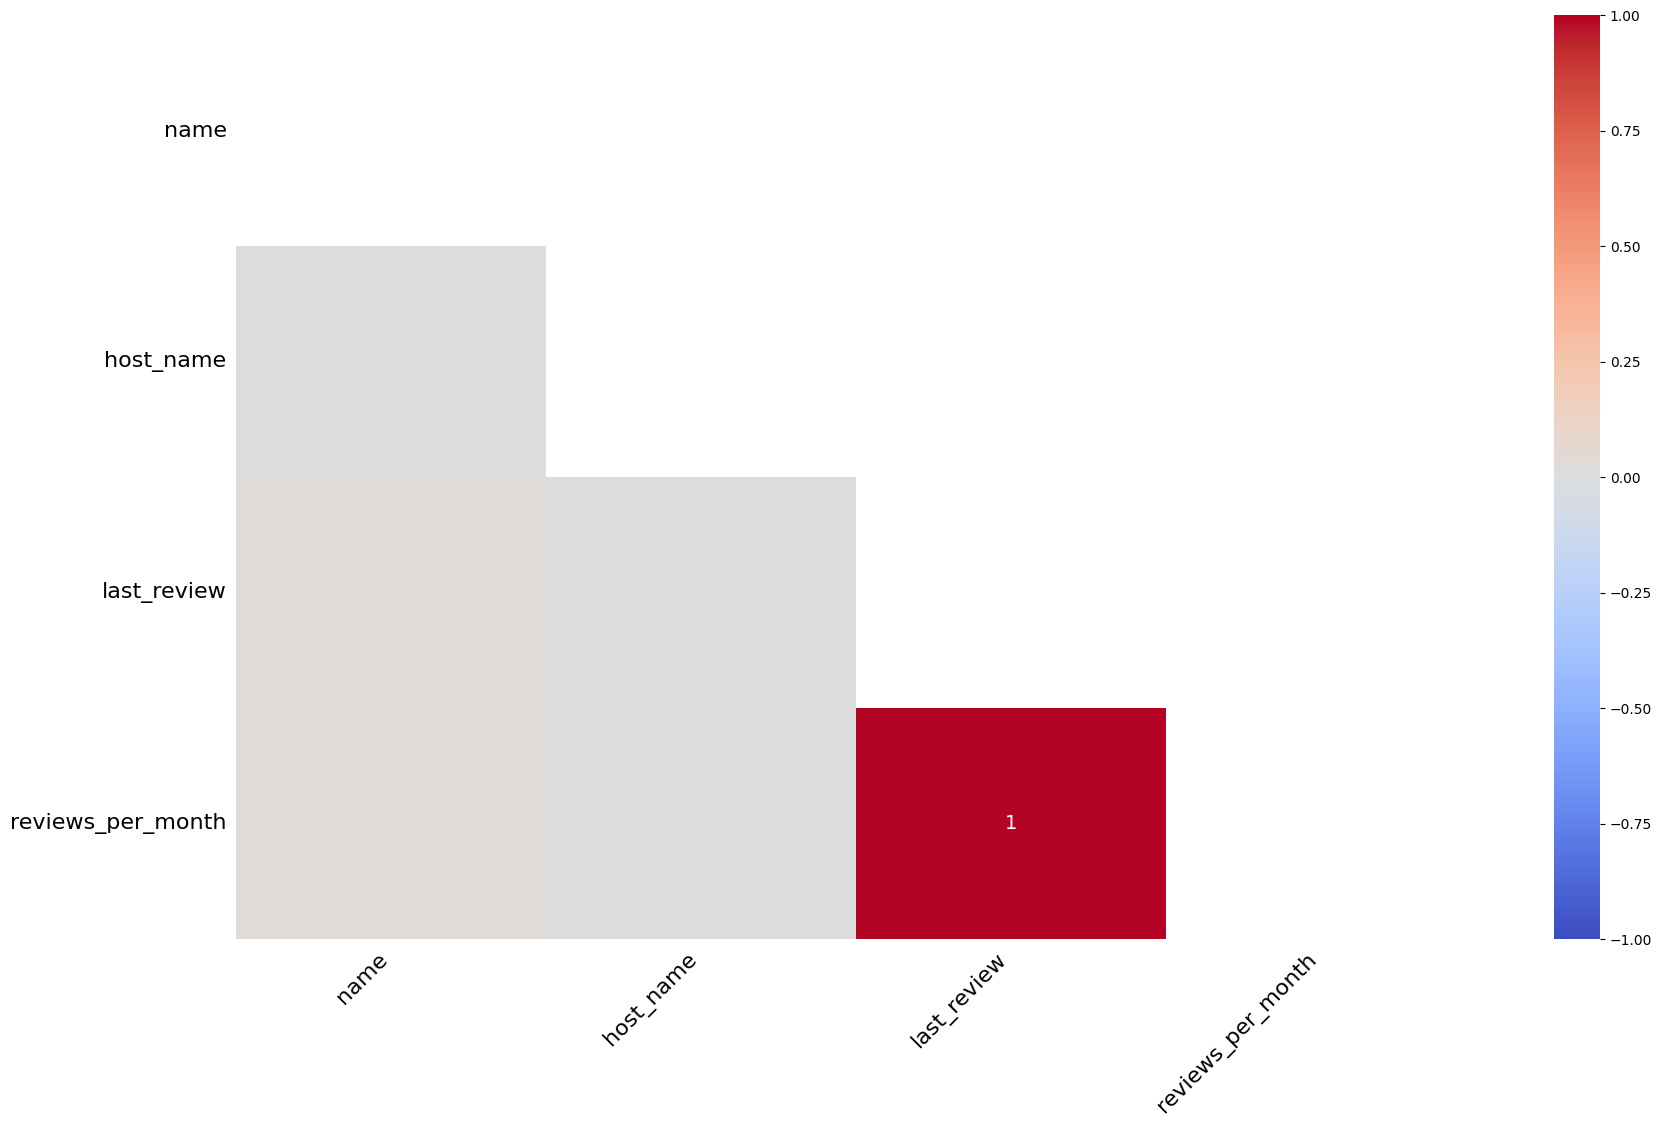

In [32]:
msno.heatmap(air_df,cmap='coolwarm')


### What did you know about your dataset?

from above we can say that name, host_name, last_review, reviews_per_month has the null values

## ***2. Understanding Your Variables***

In [34]:
air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [35]:
air_df.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

from the above we can say

1. average price is 152

2. average availability is 112 days

3. here the minimun price is Zero* so we have to do something about this*.

In [37]:
len(air_df[air_df['price']==0])

11

now we see that there are only 11 values which contains price =0. hence we should replace this price by mean of the price.

In [38]:
air_df['price'].replace(0,round(air_df['price'].mean(),2),inplace=True)
air_df['price'].describe()

count    48895.000000
mean       152.755045
std        240.143242
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

now we do not have price zero.

### Variables Description

Here we will explore and visualise data in order to discover key understandings like differernt hosts and areas, busiest host, effect of loctation, price and reviews on bookings and corelation between location, price,reviews,noticeble difference in traffic among differrent areas,price distribution,room types available most expensive neighbourhood group etc.

### Check Unique Values for each variable.

In [41]:
air_df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [42]:
len(air_df.neighbourhood.unique())

221

There are total 221 neighbourhoods (areas) in given dataset

Let us find Top listing areas i.e. areas where number of listings are maximum using 'neighbourhood' column in our dataset.

In [44]:
# let us find total no of host in datset
Number_of_hosts=air_df.host_id.unique()
Number_of_hosts

array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814])

In [45]:
len(Number_of_hosts)

37457

There are total 37457 hosts in given dataset.

In [46]:
top_host_id = air_df['host_id'].value_counts().head(10)
top_host_id

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [47]:
top_host_id.sum()

1270

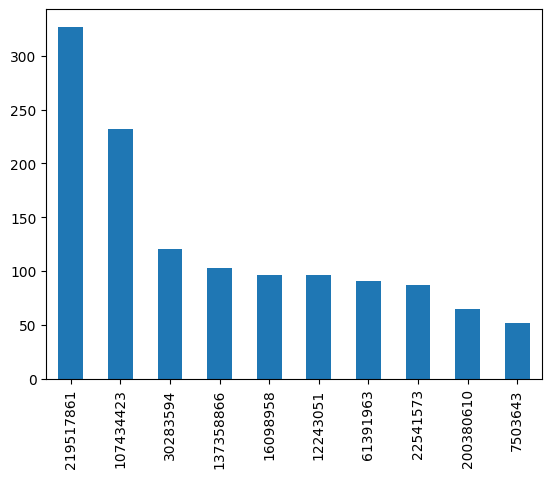

In [48]:
# let us visualize  top_host_id using bar chart.
top_host_id.plot (kind='bar')
plt.title=('top_10 host_id')
plt.ylabel=('count')
plt.xlabel=('host_id')

From above bar chart it is observed that host with host_id = 219517861 has 327 listings also hosts with host_id 12243051,16098958 have same number of listings

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-49-a0ca816d39f3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=air_df.corr(method='kendall')


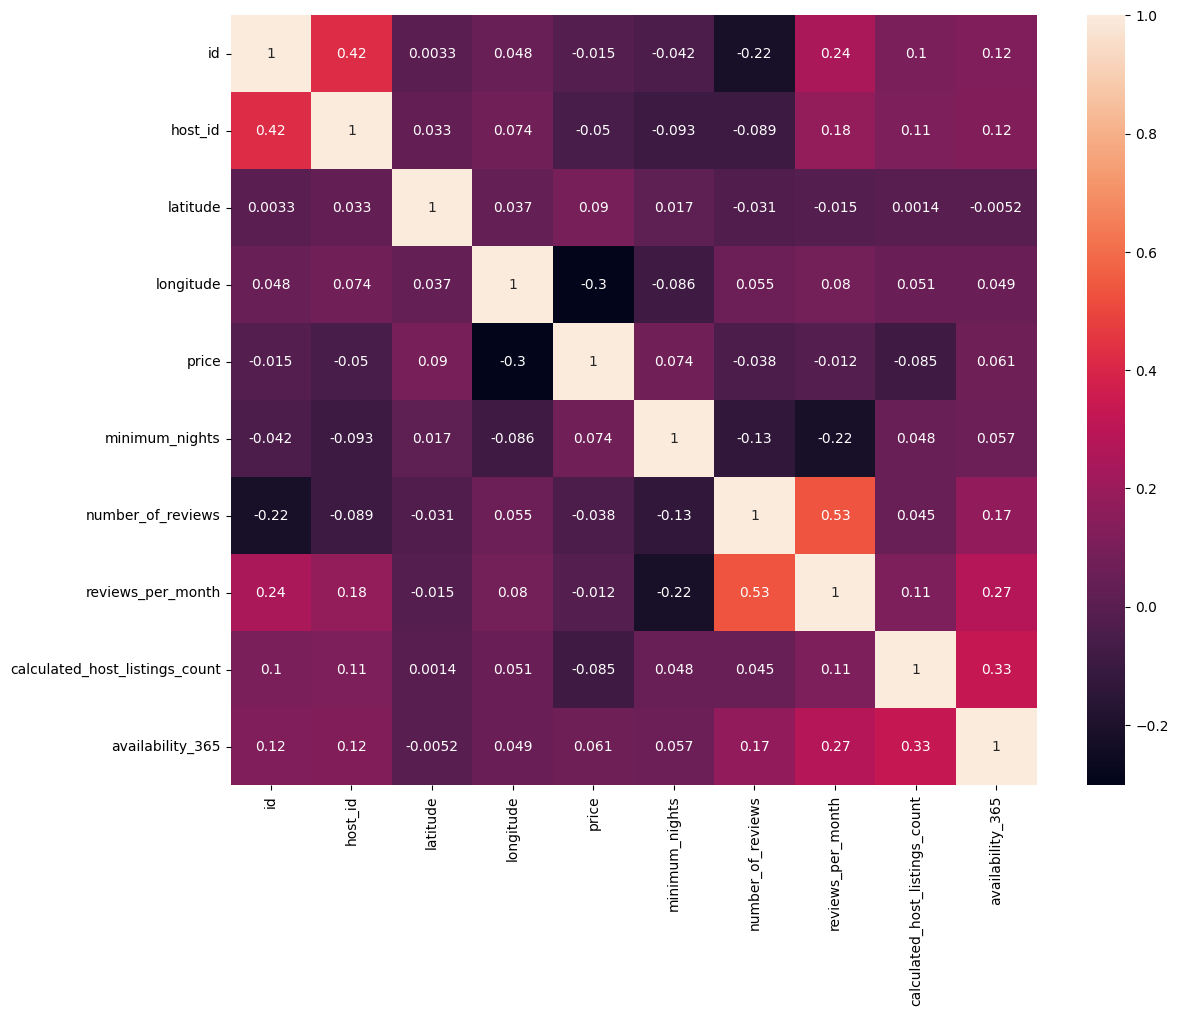

In [49]:
# Chart - 1
# Let us see correletion between the predictions such as location, price, reviews
corr=air_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title=('correlation between location, price,reviews\n')
sns.heatmap(corr,annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From above corelation plot it is observed that there is no strong corelation between any factors but calculated_host_listing_count and Availability_365 are weakly corelated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

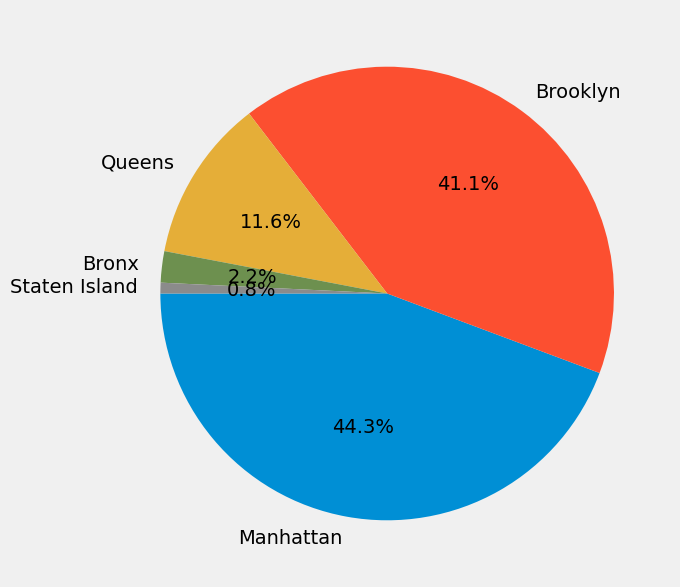

In [50]:
# Chart - 2
#Visualise number of listings  in different locations with help of pie chart.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title=("neighbourhood group")
g=plt.pie(air_df.neighbourhood_group.value_counts(),labels=air_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

from above pie chart it is observed that maximum number of listings in NewYark are found in 'Manhatten(44.3%) of total listings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0, 0.5, 'price')

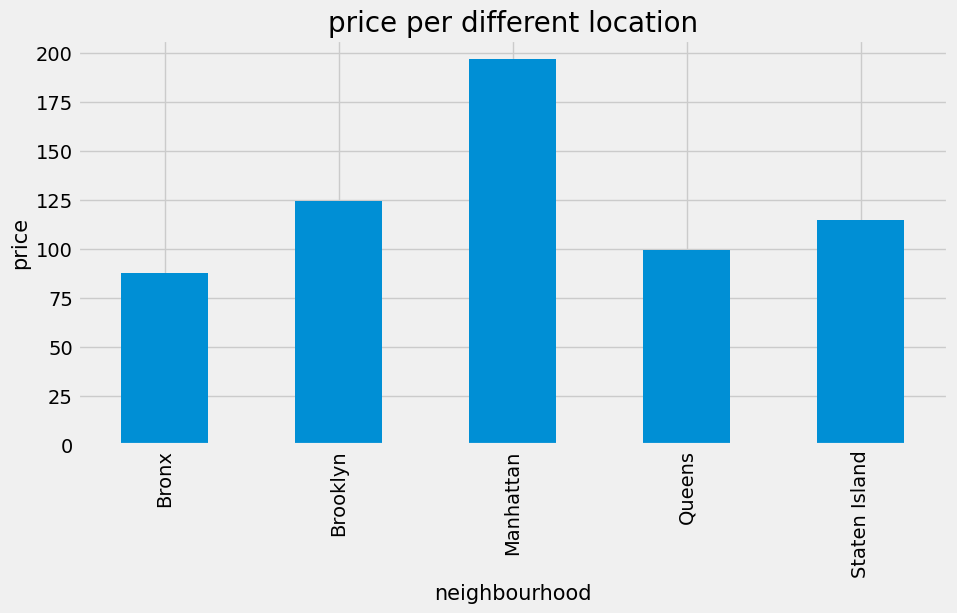

In [52]:

# let us find relation between location i.e.neighbourhood_group and price.
price_vs_location = air_df.groupby(['neighbourhood_group'])['price'].mean()
price_vs_location
# Chart - 3
# Let us visualise price_vs_location .
ax= price_vs_location.plot.bar(figsize=(10,5),fontsize=14)
ax.set_title('price per different location',fontsize=20)
ax.set_xlabel('neighbourhood',fontsize=15)
ax.set_ylabel('price',fontsize=15)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From above plot it is observed that Manhattan is most expensive location in given dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [59]:
# Let us find the busiest host using host_id and minimum nights column in our dataset.
Busy_host=air_df.groupby(['host_id']).minimum_nights.mean()
Busy_host=Busy_host.sort_values(ascending=True)
Busy_host

host_id
12872352        1.0
213568384       1.0
126510786       1.0
18018059        1.0
18023496        1.0
              ...  
3680008       500.0
200401254     999.0
2697686       999.0
6676776      1000.0
17550546     1250.0
Name: minimum_nights, Length: 37457, dtype: float64

In [60]:

# Let us find top 10 busy hosts.
Top_busy_hosts=Busy_host.tail(10)
Top_busy_hosts

host_id
43945071      480.0
2228137       500.0
10720264      500.0
82674375      500.0
8996336       500.0
3680008       500.0
200401254     999.0
2697686       999.0
6676776      1000.0
17550546     1250.0
Name: minimum_nights, dtype: float64

#### Chart - 4

<function matplotlib.pyplot.show(close=None, block=None)>

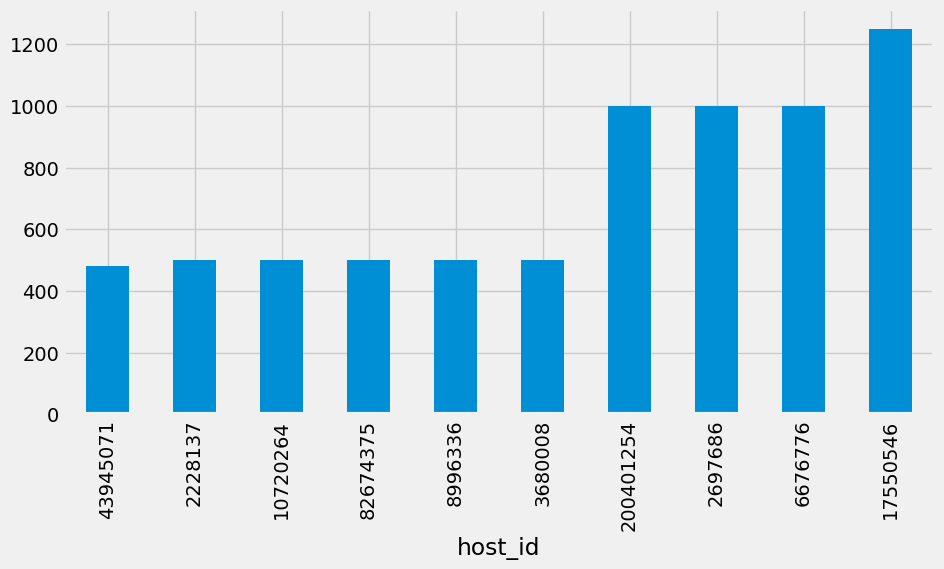

In [61]:
# Chart - 4
# Let us visualise top 10 busy hosts to find busiest host using bar plot.
plt.rcParams['figure.figsize']=(10,5)
Top_busy_hosts.plot(kind='bar')
plt.title=('Top_busy_host')
plt.ylabel=('minimum_nights')
plt.xlabel=('host_id')
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From above bar plot it is observed that host with host_id 17550546 is busiest host in given dataset as number of minimum nights spend at listings belongs to host id 17550546 are more.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [64]:
# Chart - 5 visualization code
most_expensive_area=air_df.groupby(['neighbourhood_group']).price.mean()
most_expensive_area=most_expensive_area.sort_values(ascending=False)
most_expensive_area

neighbourhood_group
Manhattan        196.882864
Brooklyn         124.451576
Staten Island    114.812332
Queens            99.517649
Bronx             87.636774
Name: price, dtype: float64

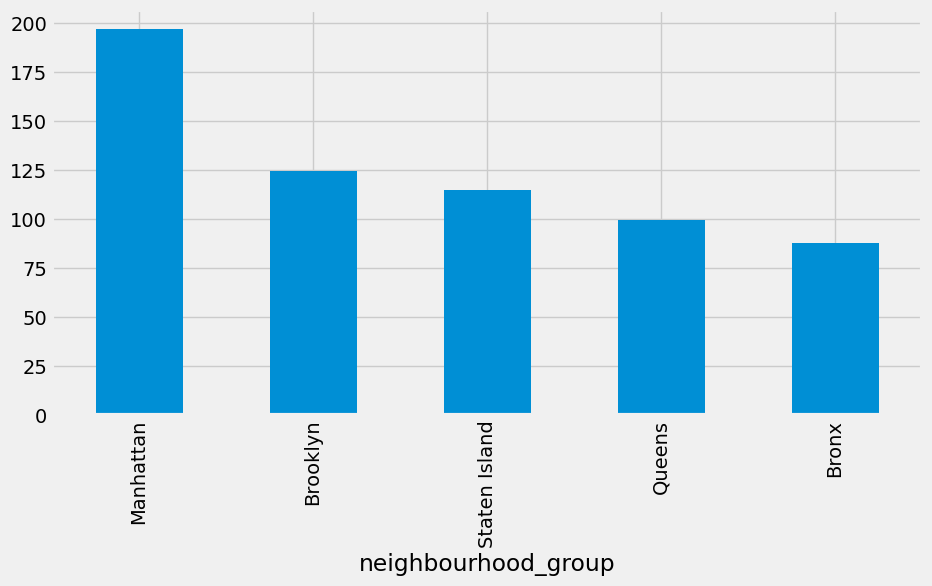

In [65]:
# Let us visualise most_expensive_area using bar plot
most_expensive_area.plot(kind='bar')
plt.title=('most_expensive_area')
plt.xlable=('neighbourhood_group')
plt.ylable=('price')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

from above bar plot it is observed that Manhattan is most expensive area in given dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

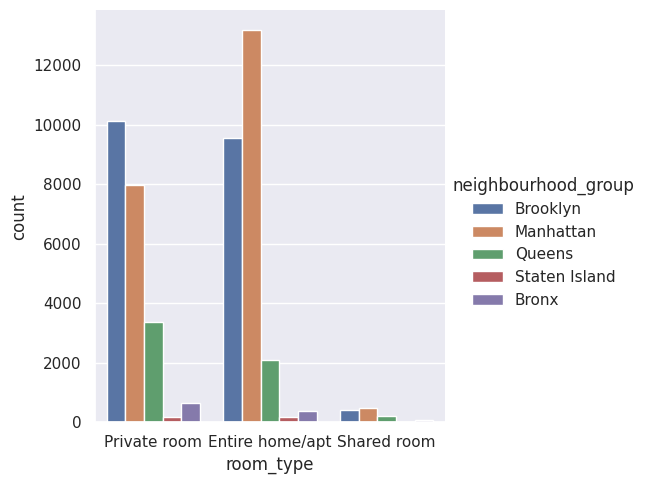

In [70]:
# Chart - 6
# Let us visualise room_type location per neighbourhood group
sns.set(rc={'figure.figsize':(10,10)})
title='Room types location per neighbourhood group'
sns.catplot(x='room_type',kind='count',hue='neighbourhood_group',data=air_df);
plt.title=(title)
plt.ioff()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Majority of entire home/apartment are located in Manhattan

Majority of private rooms are located in brooklyn

Relation between neighbourhood group and availability of room

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

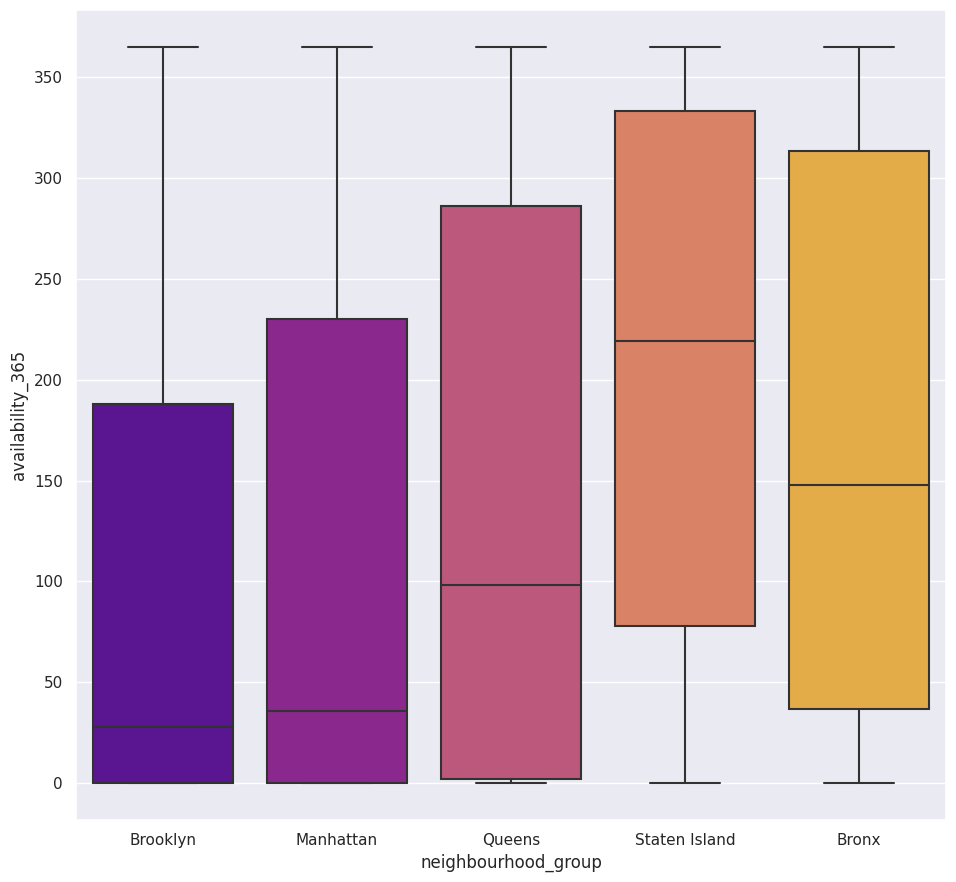

In [75]:
# Chart - 7 visualization code
# Let us visualise relationship  between neighbourhood group and availability 365 using boxplot
plt.figure (figsize= (10,10))
ax= sns.boxplot(data=air_df,x='neighbourhood_group',y='availability_365',palette='plasma')
plt.show(ax)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Above plot shows relation between neighbourhood_group and availability_365

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [84]:
# Chart - 8 visualization code
n = air_df.neighbourhood_group.unique()
nbd_grp = list(n)


In [85]:
def plot_nbd():
  plt.figure(figsize=(10,5))
  nbd_cnts=[]
  for i in nbd_grp:
    nbd_cnts.append(air_df['id'][air_df['neighbourhood_group']==i].value_counts().sum())

  plt.plot(nbd_grp,nbd_cnts)

  plt.legend(nbd_grp)
  print(nbd_cnts)

[20104, 21661, 5666, 373, 1091]


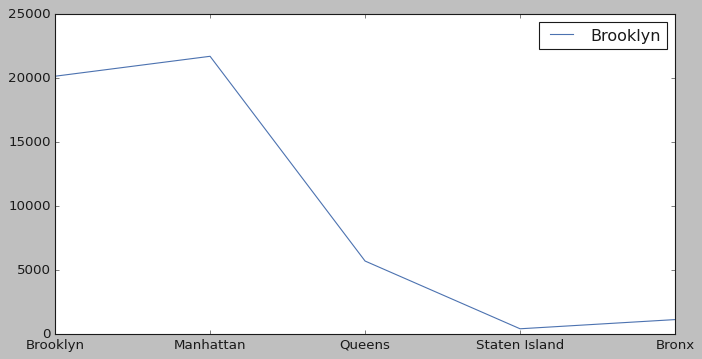

In [90]:
plot_nbd()
plt.show(plot_nbd)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

This gives information about the count of properties present in those 5 cities. We can observe that Brooklyn and Manhattan has more properties when compared to all 5 cities. In particular, Manhattan is the city which is busy city with most properties to offer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [104]:
# Chart - 9 visualization code
famous_host = air_df['host_id'].value_counts().head(20)
famous_host = pd.DataFrame(famous_host)
famous_host.reset_index(inplace=True)
famous_host.rename(columns={'index':'Host_id','host_id':'Count'},inplace=True)
famous_host.head(2)

,Host_id,Count
0,219517861,327
1,107434423,232


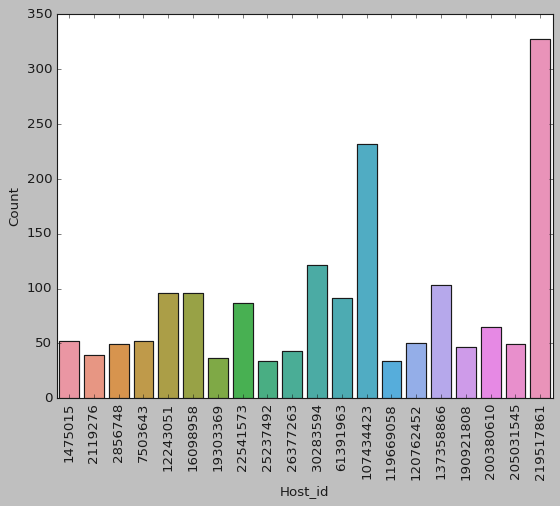

In [106]:
plt1 = sns.barplot(x='Host_id',y='Count',data=famous_host)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Above is the visualization which describes top 10 hosts whoever has the most number of properties to offer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

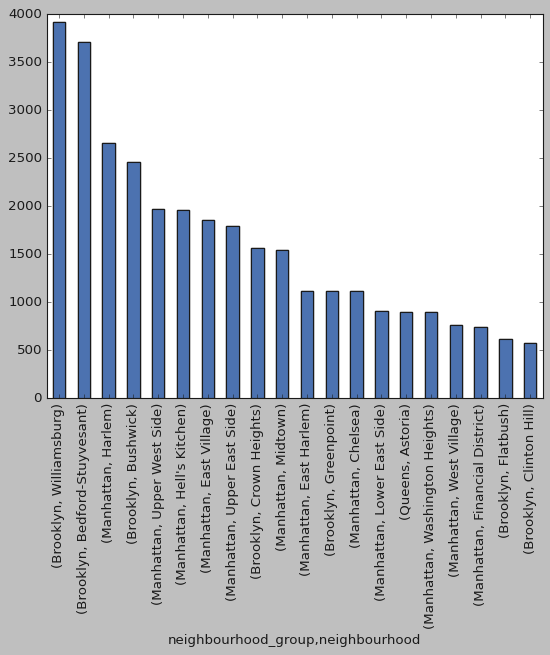

In [112]:
# Chart - 10 visualization code
df_common=air_df.groupby(['neighbourhood_group'])['neighbourhood'].value_counts()
df_common=df_common.sort_values(axis=0, ascending=False).head(20)
df_common.plot.bar()

plt.show()

In [113]:
df_common

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
                     East Harlem           1117
Brooklyn             Greenpoint            1115
Manhattan            Chelsea               1113
                     Lower East Side        911
Queens               Astoria                900
Manhattan            Washington Heights     899
                     West Village           768
                     Financial District     744
Brooklyn             Flatbush               621
                     Clinton Hill           572


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

from the above plot we can say that willamburg(Brooklyn) is the most common neighbourhood across all the neighbourhood group

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

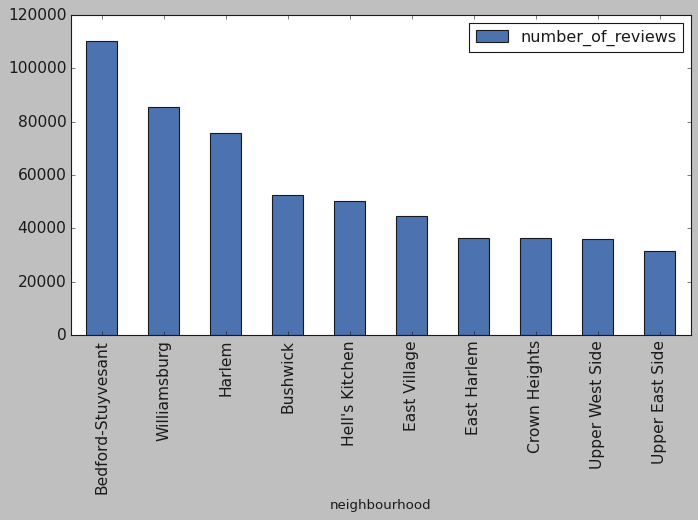

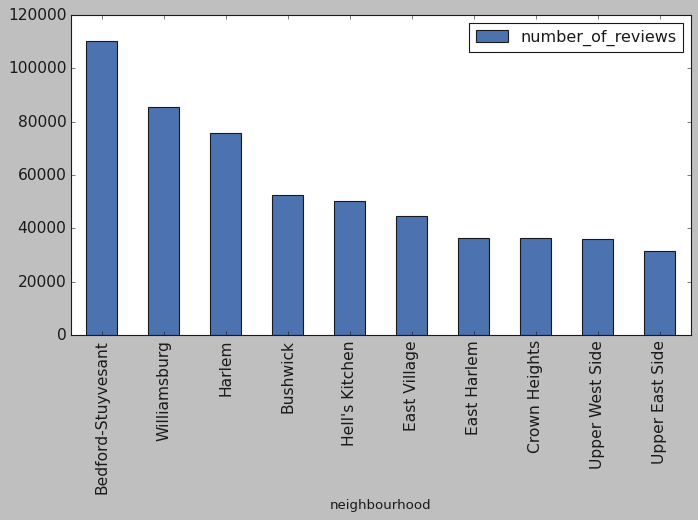

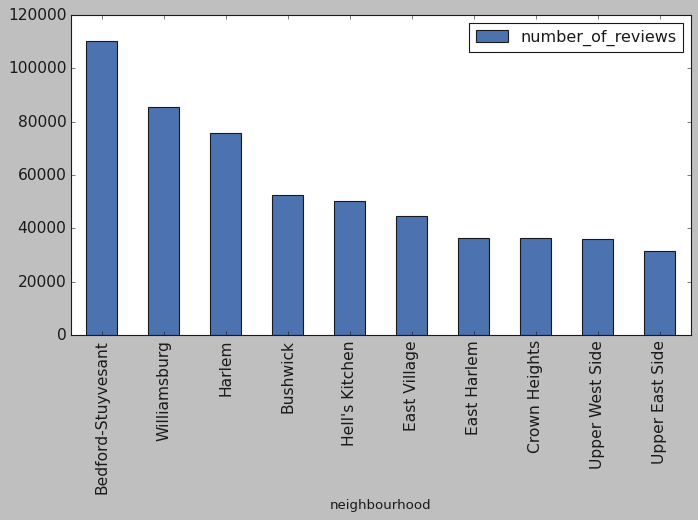

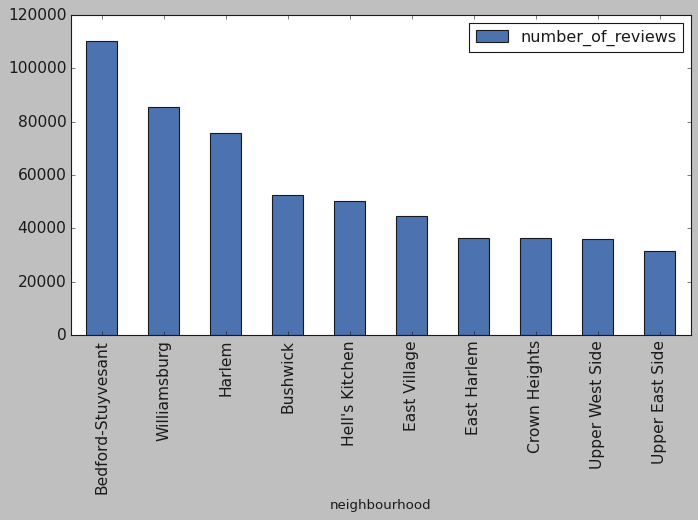

In [117]:
# Chart - 11 visualization code
df_reviews=air_df.groupby(['neighbourhood','neighbourhood_group'])['number_of_reviews'].sum().reset_index()

df_reviews=df_reviews.sort_values(['number_of_reviews'],ascending=False).head(10)
df_reviews=df_reviews.set_index('neighbourhood')
df_reviews.plot.bar(figsize = (10,5),fontsize = 14)
plt.show()

In [118]:
df_reviews

,neighbourhood_group,number_of_reviews
neighbourhood,,
Bedford-Stuyvesant,Brooklyn,110352
Williamsburg,Brooklyn,85427
Harlem,Manhattan,75962
Bushwick,Brooklyn,52514
Hell's Kitchen,Manhattan,50227
East Village,Manhattan,44670
East Harlem,Manhattan,36446
Crown Heights,Brooklyn,36408
Upper West Side,Manhattan,36058


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

from the above plot we can conclude Bedford-Stuyvesant (Brooklyn) gets the highest number of reviews from this we can say that this neighbourhood provides the best facilities and in top 10 we only see manhattan and Brooklyn

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***